In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diabetes dataset
# If you have a specific file path, replace 'diabetes.csv' with your actual file path
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset to verify it loaded correctly
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Basic statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.1054

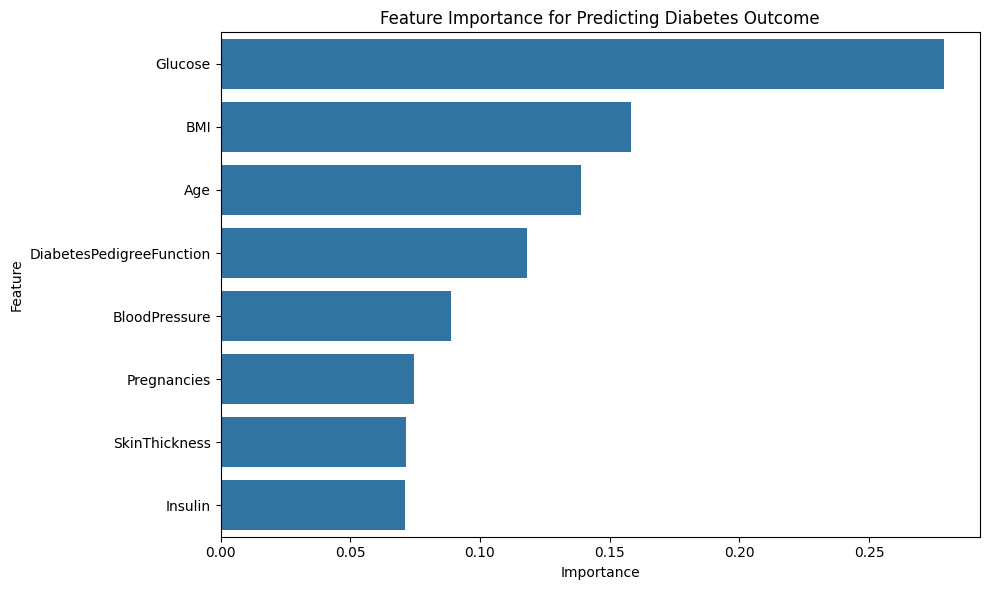

In [2]:
# Check basic information about the dataset
print("Dataset information:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Feature importance analysis using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data
X = df.drop('Outcome', axis=1)  # Features (all columns except Outcome)
y = df['Outcome']               # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature importance from Random Forest model:")
print(feature_importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance for Predicting Diabetes Outcome')
plt.tight_layout()
plt.show()


Random Forest Results:
Accuracy: 0.7344

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       123
           1       0.62      0.65      0.64        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.74      0.73      0.74       192



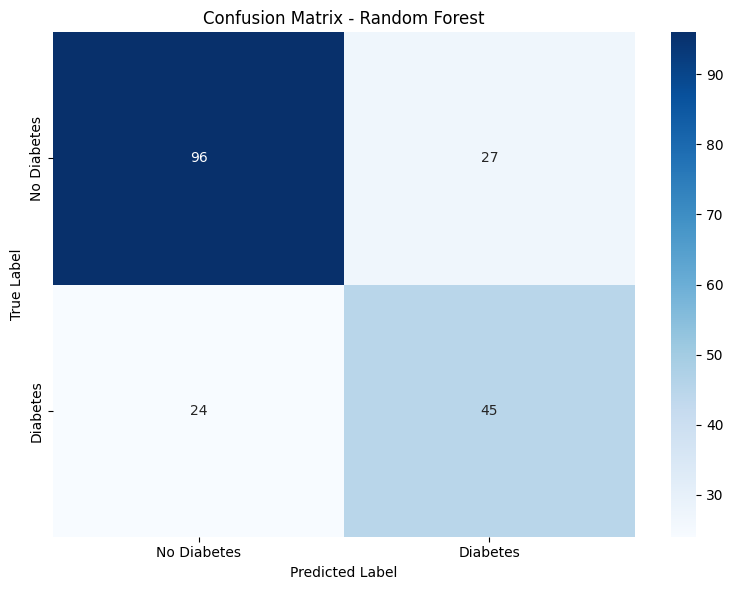


Logistic Regression Results:
Accuracy: 0.7292

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



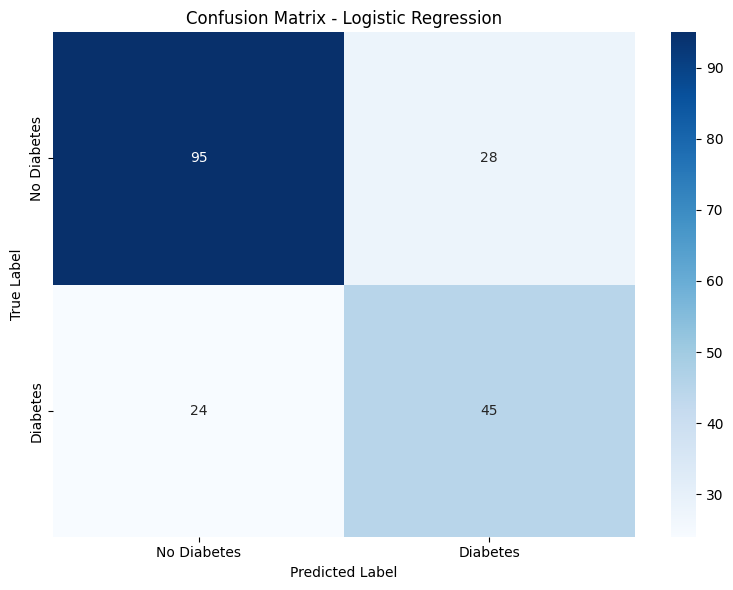


Support Vector Machine Results:
Accuracy: 0.7292

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       123
           1       0.64      0.57      0.60        69

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.72      0.73      0.73       192



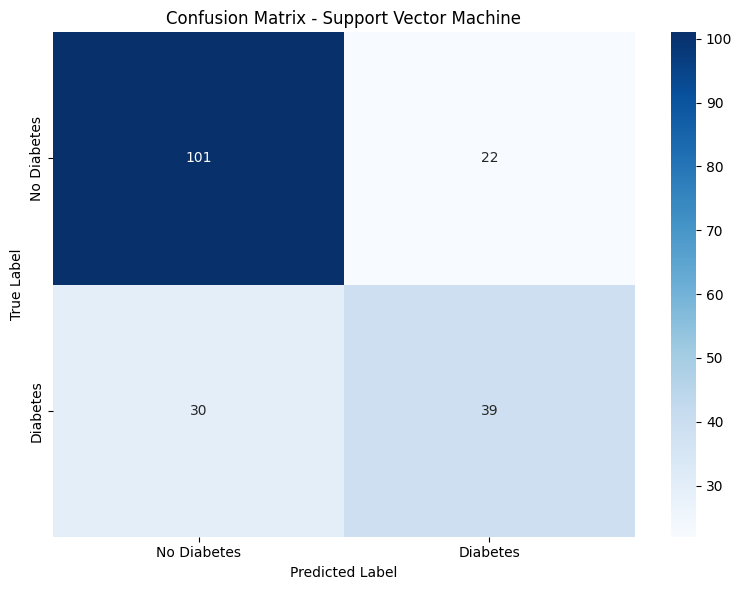



Cross-Validation Scores:
Random Forest - Mean accuracy: 0.7657, Std: 0.0357
Logistic Regression - Mean accuracy: 0.7709, Std: 0.0247
Support Vector Machine - Mean accuracy: 0.7709, Std: 0.0225


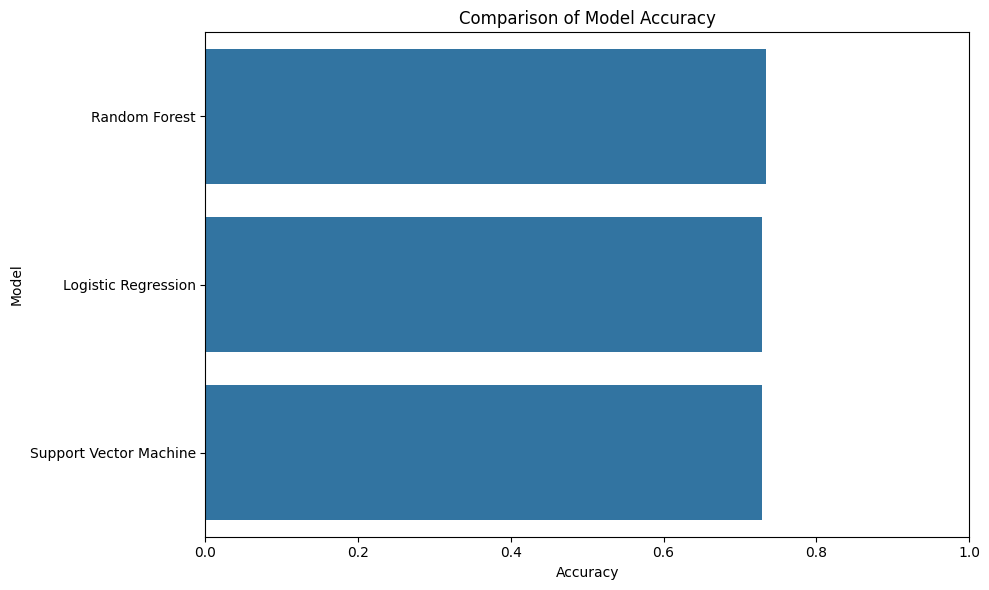


Random Forest Feature Importance:
                    Feature  Importance
1                   Glucose    0.278761
5                       BMI    0.158058
7                       Age    0.139093
6  DiabetesPedigreeFunction    0.118225
2             BloodPressure    0.088883
0               Pregnancies    0.074491
3             SkinThickness    0.071575
4                   Insulin    0.070913


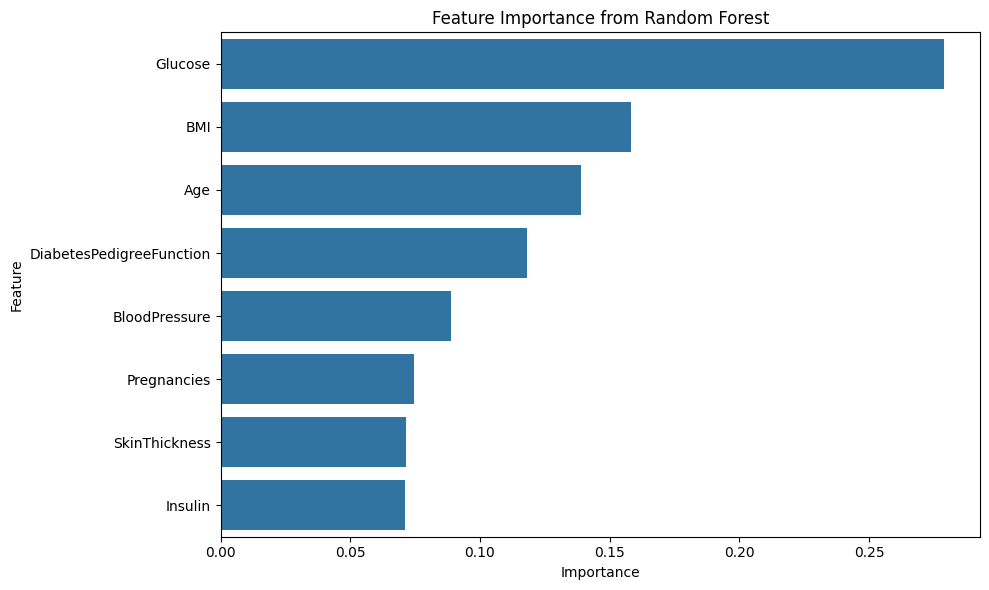

In [3]:
# Data mining models for prediction
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Scale features for better performance with some algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Initialize the three models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Print results
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

# Compare models using cross-validation for more robust comparison
print("\n\nCross-Validation Scores:")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name} - Mean accuracy: {cv_scores.mean():.4f}, Std: {cv_scores.std():.4f}")

# Visualize model comparison
plt.figure(figsize=(10, 6))
models_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': list(results.values())
})
sns.barplot(x='Accuracy', y='Model', data=models_df)
plt.title('Comparison of Model Accuracy')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# Feature importance from Random Forest (since it's often the most interpretable)
rf_model = models['Random Forest']
if hasattr(rf_model, 'feature_importances_'):
    importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nRandom Forest Feature Importance:")
    print(importances)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importances)
    plt.title('Feature Importance from Random Forest')
    plt.tight_layout()
    plt.show()


----- CNN Model -----


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 7, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        19,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,593 (76.54 KB)

 Trainable params: 19,593 (76.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6762 - loss: 0.6242 - val_accuracy: 0.7155 - val_loss: 0.5796
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7642 - loss: 0.5361 - val_accuracy: 0.7241 - val_loss: 0.5445
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7645 - loss: 0.5085 - val_accuracy: 0.7500 - val_loss: 0.5196
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7692 - loss: 0.5164 - val_accuracy: 0.7328 - val_loss: 0.5145
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7835 - loss: 0.4997 - val_accuracy: 0.7414 - val_loss: 0.4995
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7822 - loss: 0.4965 - val_accuracy: 0.7414 - val_loss: 0.5020
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7740 - loss: 0.5046 - val_accuracy: 0.7500 - val_loss: 0.4893
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7808 - loss: 0.4982 - val_accuracy: 0.7414

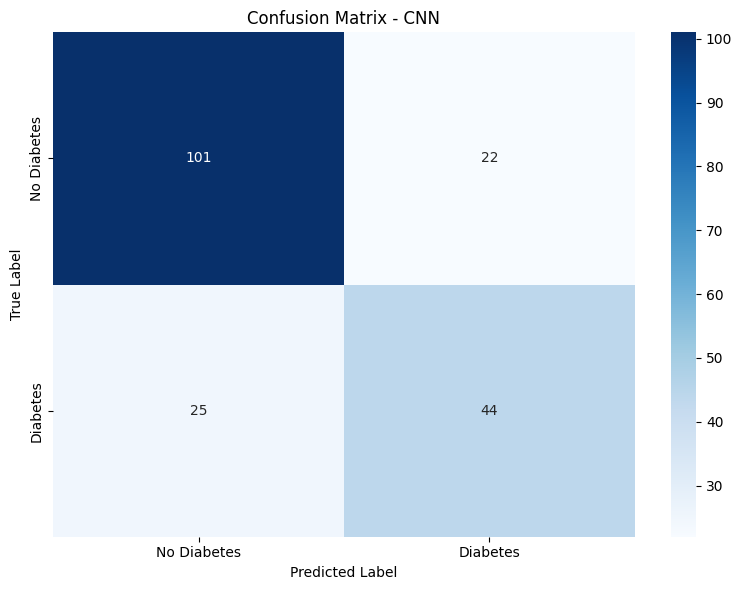

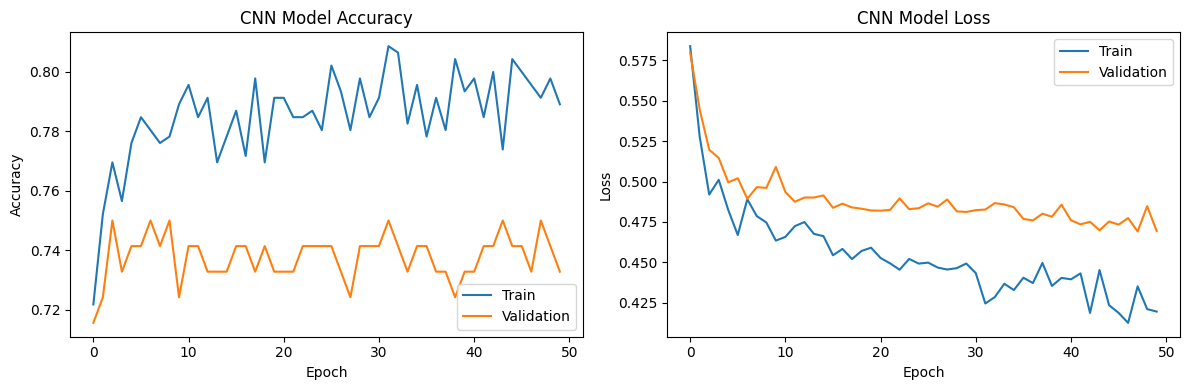


----- LSTM Model -----


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 8, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7073 - loss: 0.6706 - val_accuracy: 0.6810 - val_loss: 0.5918
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7324 - loss: 0.5422 - val_accuracy: 0.7069 - val_loss: 0.5769
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7381 - loss: 0.5281 - val_accuracy: 0.6983 - val_loss: 0.5758
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7370 - loss: 0.5297 - val_accuracy: 0.6897 - val_loss: 0.5765
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7381 - loss: 0.5348 - val_accuracy: 0.6897 - val_loss: 0.5743
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7374 - loss: 0.5301 - val_accuracy: 0.6897 - val_loss: 0.5732
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7445 - loss: 0.5301 - val_accuracy: 0.6810 - val_loss: 0.5748
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7425 - loss: 0.5286 - val_accuracy: 0.681

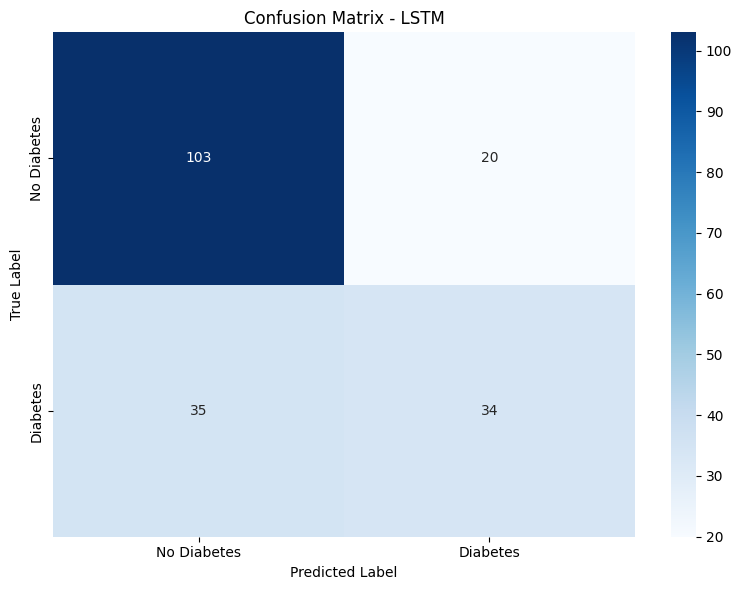

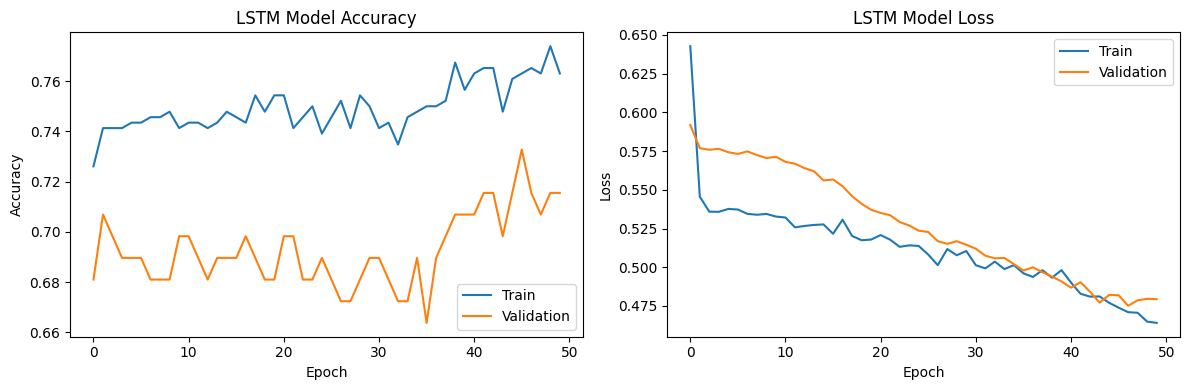


----- Autoencoder Model -----


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 560 (2.19 KB)

 Trainable params: 560 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.0087 - val_loss: 0.8793
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9177 - val_loss: 0.8200
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8452 - val_loss: 0.7601
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7658 - val_loss: 0.6971
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6900 - val_loss: 0.6450
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6277 - val_loss: 0.6028
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5753 - val_loss: 0.5646
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5267 - val_loss: 0.5265
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4807 - val_loss: 0.4865
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4360 - val_loss: 0.4434
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3936 - val_loss: 0.4055
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3600 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6179 - loss: 0.7923 - val_accuracy: 0.5776 - val_loss: 0.8090
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5897 - loss: 0.7463 - val_accuracy: 0.5776 - val_loss: 0.7820
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6087 - loss: 0.7288 - val_accuracy: 0.6034 - val_loss: 0.7626
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5534 - loss: 0.7479 - val_accuracy: 0.6207 - val_loss: 0.7399
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6253 - loss: 0.6729 - val_accuracy: 0.6207 - val_loss: 0.7202
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6676 - loss: 0.6535 - val_accuracy: 0.6207 - val_loss: 0.7007
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6667 - loss: 0.6589 - val_accuracy: 0.6034 - val_loss: 0.6790
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6737 - loss: 0.6051 - val_accuracy: 0.6207 - val_loss: 0.6659
Ep

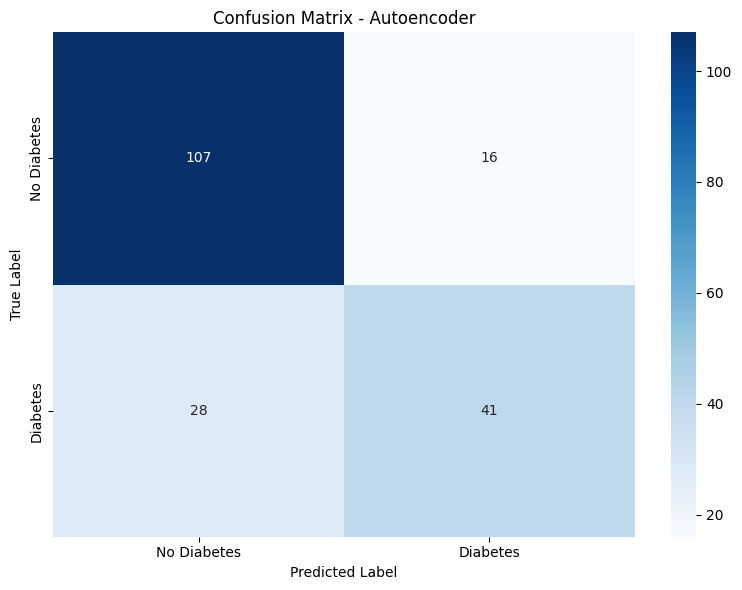

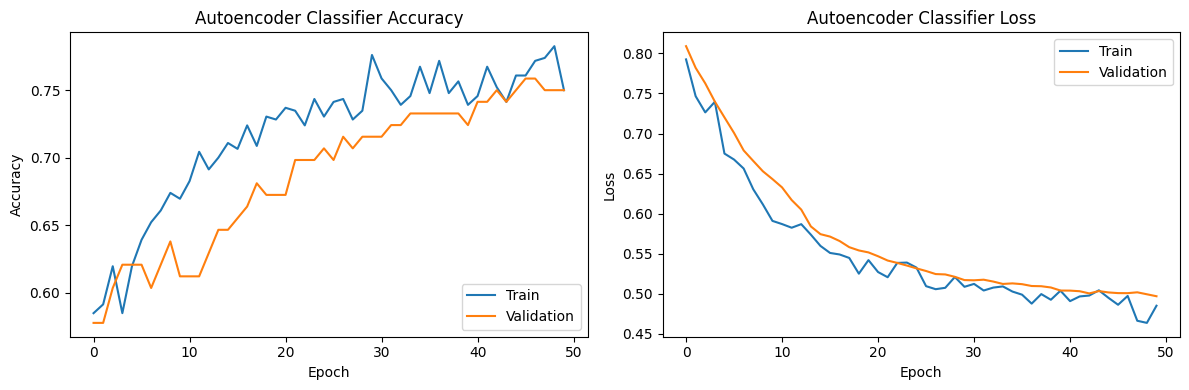

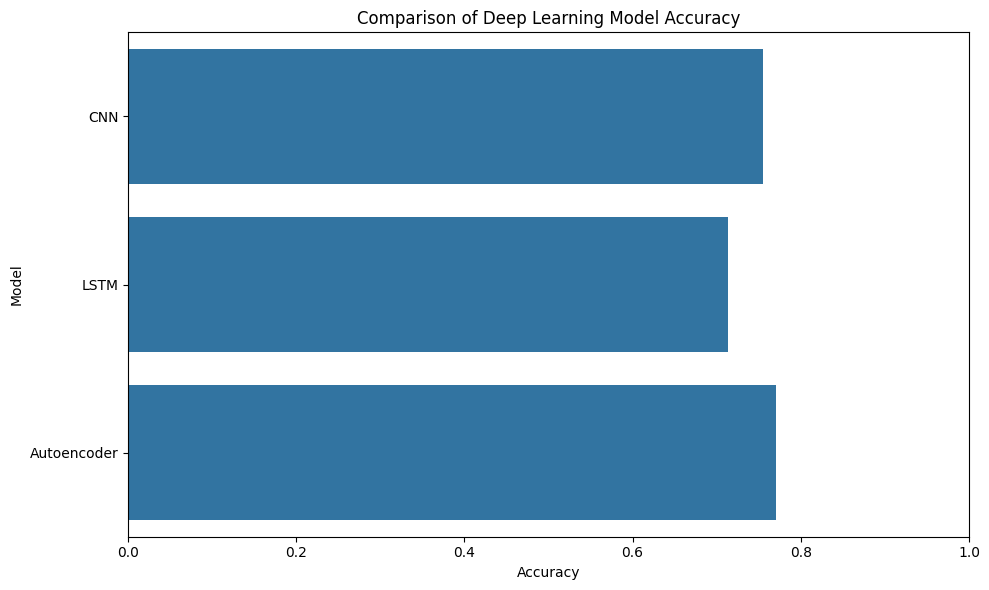



Model Accuracy Comparison:
CNN: 0.7552
LSTM: 0.7135
Autoencoder: 0.7708


In [4]:
# Deep learning models for diabetes prediction
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D, LSTM, RepeatVector, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Prepare data
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# For CNN and LSTM, reshape the data to 3D [samples, timesteps, features]
# Treating each feature as a "timestep" for this example
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Initialize results dictionary
deep_results = {}

# 1. CNN Model
print("\n----- CNN Model -----")
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(cnn_model.summary())

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
cnn_history = cnn_model.fit(
    X_train_reshaped,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate CNN model
y_pred_cnn = (cnn_model.predict(X_test_reshaped) > 0.5).astype(int).flatten()
cnn_acc = accuracy_score(y_test, y_pred_cnn)
deep_results['CNN'] = cnn_acc

print(f"\nCNN Results:")
print(f"Accuracy: {cnn_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cnn))

# Plot CNN confusion matrix
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CNN')
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

# 2. LSTM Model
print("\n----- LSTM Model -----")
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(lstm_model.summary())

# Train LSTM model
lstm_history = lstm_model.fit(
    X_train_reshaped,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate LSTM model
y_pred_lstm = (lstm_model.predict(X_test_reshaped) > 0.5).astype(int).flatten()
lstm_acc = accuracy_score(y_test, y_pred_lstm)
deep_results['LSTM'] = lstm_acc

print(f"\nLSTM Results:")
print(f"Accuracy: {lstm_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lstm))

# Plot LSTM confusion matrix
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LSTM')
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

# 3. Autoencoder Model
print("\n----- Autoencoder Model -----")
# Define the encoder
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)

# Define the decoder (for training the autoencoder)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='linear')(decoded)

# Create and compile the autoencoder for unsupervised training
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

# Train the autoencoder
autoencoder_history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Create the encoder part for feature extraction
encoder = Model(inputs=input_layer, outputs=encoded)

# Get encoded features
encoded_train = encoder.predict(X_train)
encoded_test = encoder.predict(X_test)

# Train a classifier on encoded features
classifier = Sequential([
    Dense(16, activation='relu', input_shape=(8,)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier_history = classifier.fit(
    encoded_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate autoencoder+classifier model
y_pred_ae = (classifier.predict(encoded_test) > 0.5).astype(int).flatten()
ae_acc = accuracy_score(y_test, y_pred_ae)
deep_results['Autoencoder'] = ae_acc

print(f"\nAutoencoder Results:")
print(f"Accuracy: {ae_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ae))

# Plot autoencoder confusion matrix
cm_ae = confusion_matrix(y_test, y_pred_ae)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ae, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Autoencoder')
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(classifier_history.history['accuracy'])
plt.plot(classifier_history.history['val_accuracy'])
plt.title('Autoencoder Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(classifier_history.history['loss'])
plt.plot(classifier_history.history['val_loss'])
plt.title('Autoencoder Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

# Compare model accuracies
plt.figure(figsize=(10, 6))
models_df = pd.DataFrame({
    'Model': list(deep_results.keys()),
    'Accuracy': list(deep_results.values())
})
sns.barplot(x='Accuracy', y='Model', data=models_df)
plt.title('Comparison of Deep Learning Model Accuracy')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# Print overall comparison
print("\n\nModel Accuracy Comparison:")
for name, acc in deep_results.items():
    print(f"{name}: {acc:.4f}")



======= ADDITIONAL ADVANCED ALGORITHMS =======

Training XGBoost...

XGBoost Results:
Accuracy: 0.7604
Training time: 0.1718 seconds
ROC AUC Score: 0.7958

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       123
           1       0.65      0.72      0.68        69

    accuracy                           0.76       192
   macro avg       0.74      0.75      0.75       192
weighted avg       0.77      0.76      0.76       192



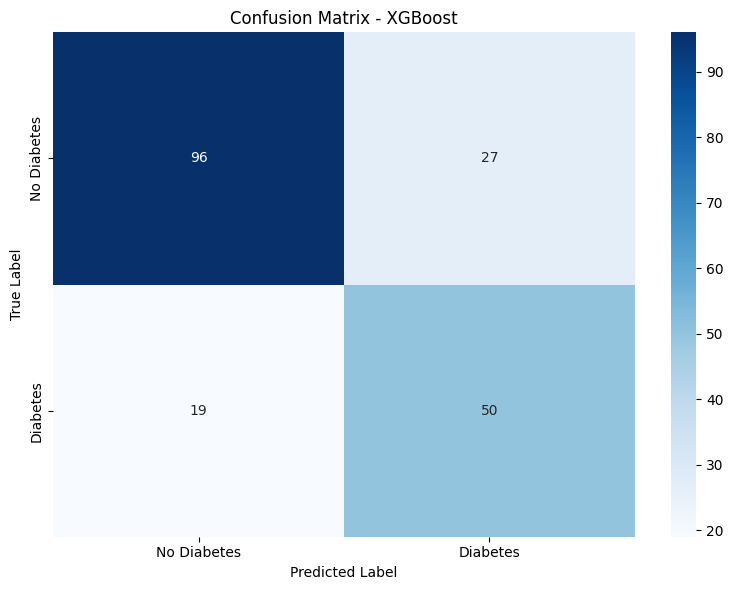

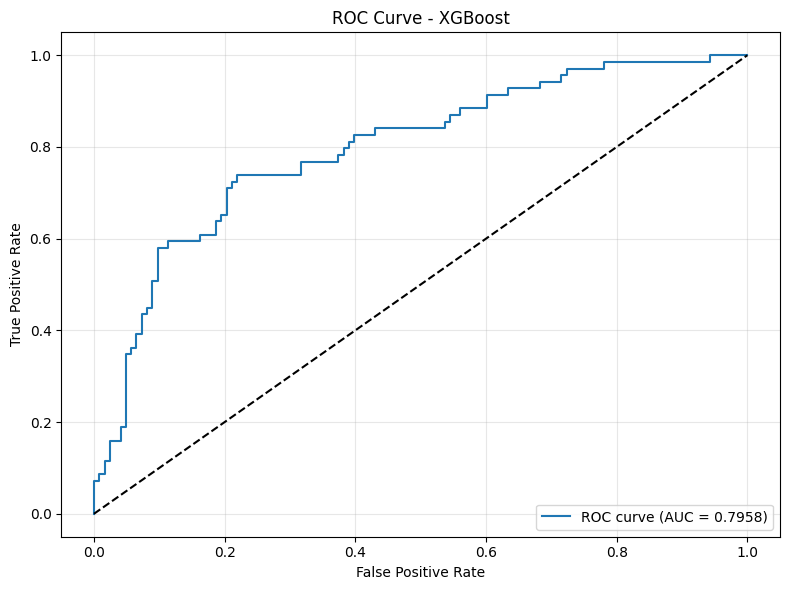


Training Gradient Boosting...

Gradient Boosting Results:
Accuracy: 0.7396
Training time: 0.3039 seconds
ROC AUC Score: 0.7913

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       123
           1       0.62      0.70      0.66        69

    accuracy                           0.74       192
   macro avg       0.72      0.73      0.72       192
weighted avg       0.75      0.74      0.74       192



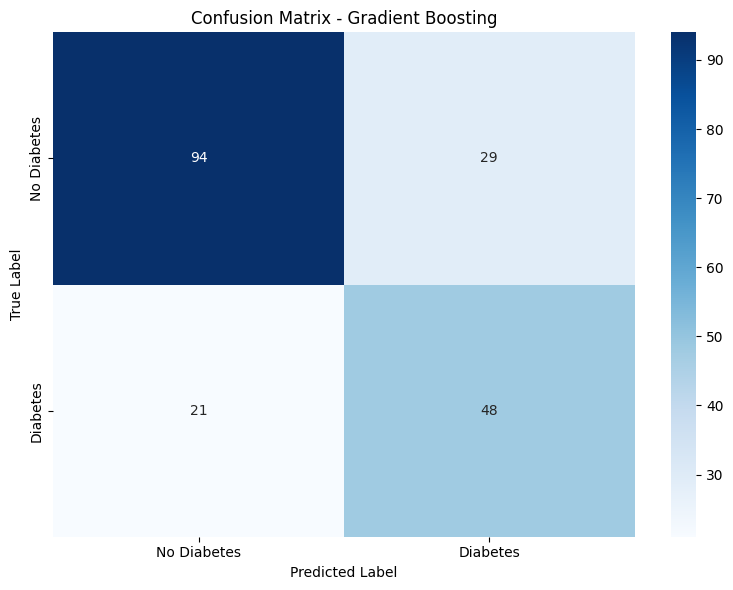

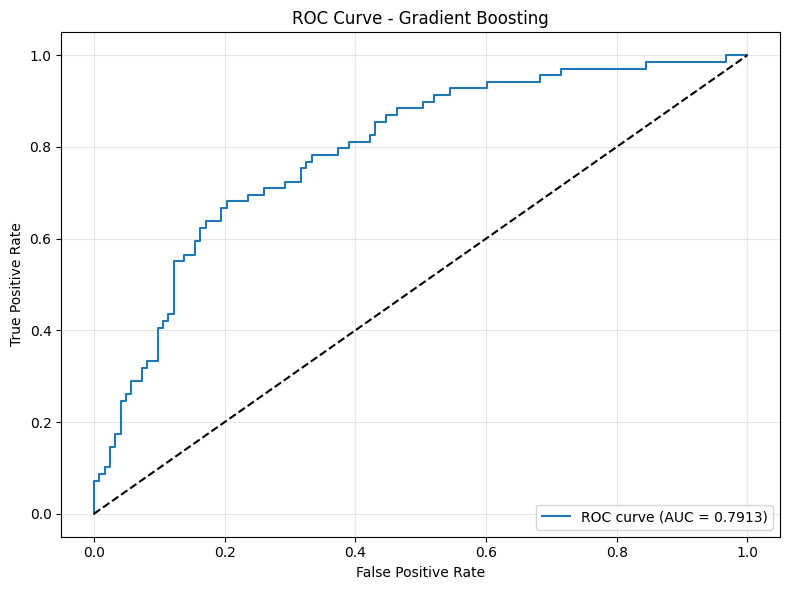


Training Neural Network...

Neural Network Results:
Accuracy: 0.6823
Training time: 3.1082 seconds
ROC AUC Score: 0.7235

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       123
           1       0.55      0.61      0.58        69

    accuracy                           0.68       192
   macro avg       0.66      0.67      0.66       192
weighted avg       0.69      0.68      0.69       192



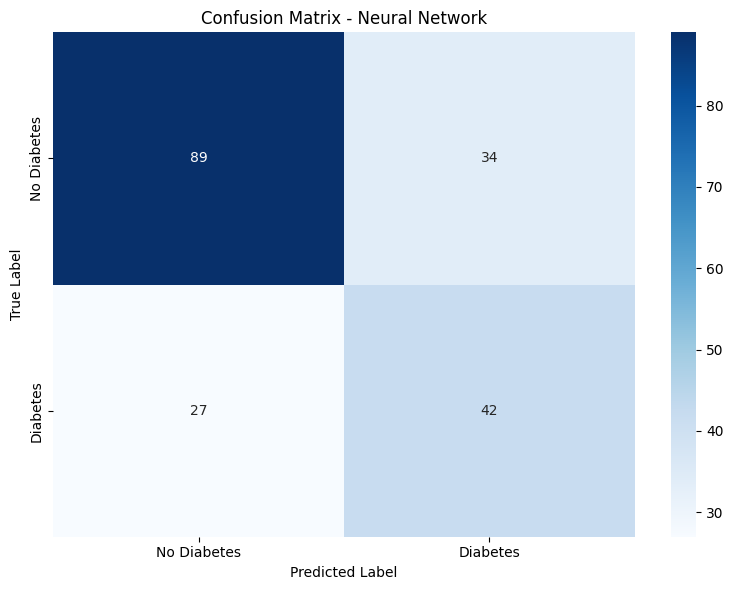

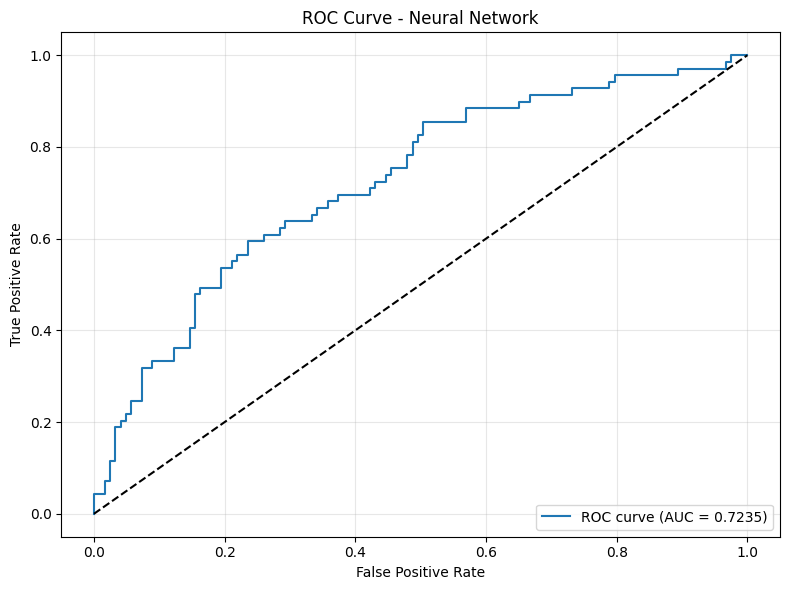


Training Naive Bayes...

Naive Bayes Results:
Accuracy: 0.7344
Training time: 0.0023 seconds
ROC AUC Score: 0.7978

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       123
           1       0.62      0.68      0.65        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.72       192
weighted avg       0.74      0.73      0.74       192



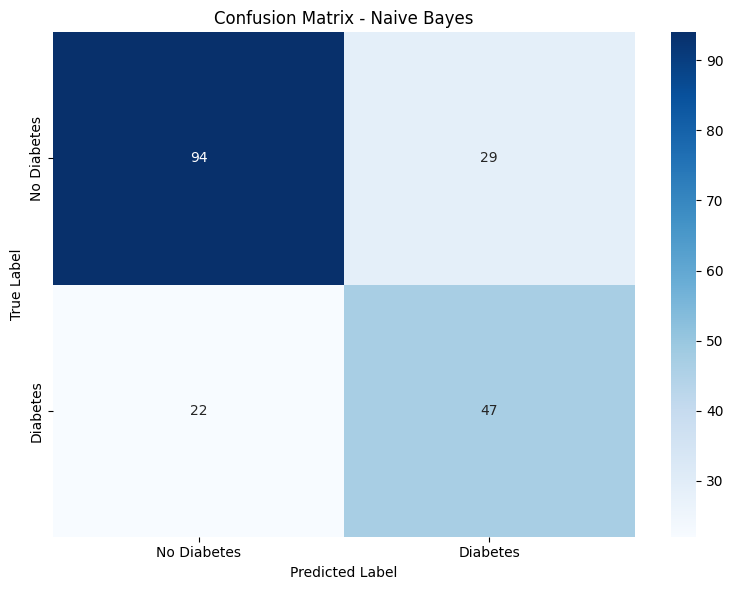

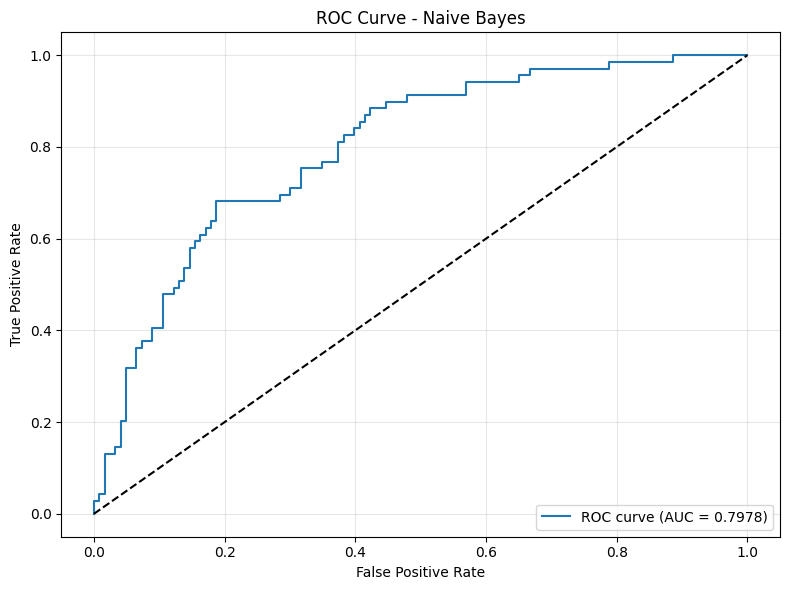


Training Decision Tree...

Decision Tree Results:
Accuracy: 0.7135
Training time: 0.0060 seconds
ROC AUC Score: 0.7160

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       123
           1       0.58      0.72      0.65        69

    accuracy                           0.71       192
   macro avg       0.70      0.72      0.70       192
weighted avg       0.73      0.71      0.72       192



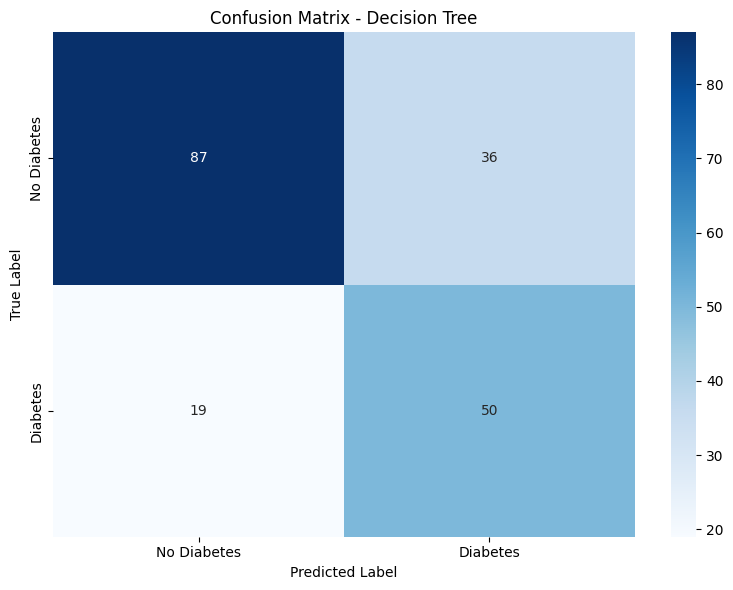

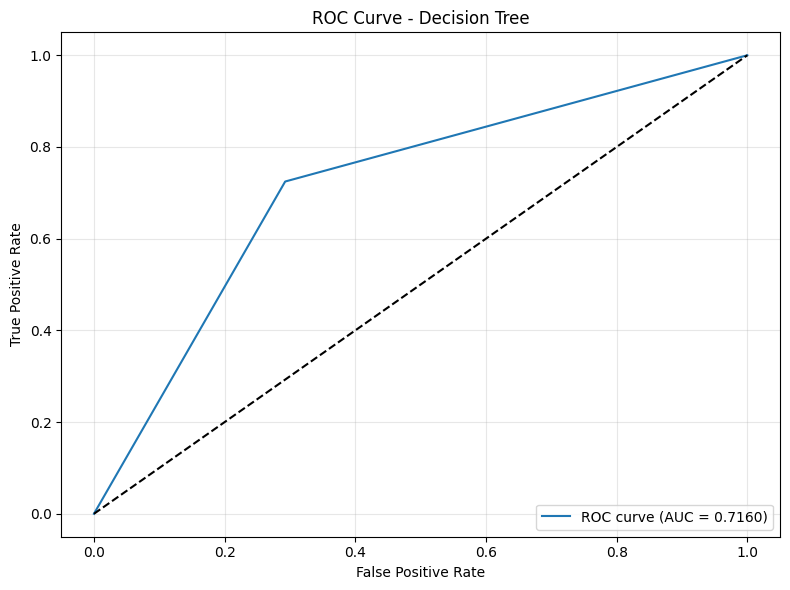

In [16]:
# Additional advanced algorithms for diabetes prediction
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import time

# Initialize additional models
additional_models = {
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Dictionary to store results for additional models
additional_results = {}
training_times = {}
roc_auc_scores = {}

# Train and evaluate each additional model
print("\n\n======= ADDITIONAL ADVANCED ALGORITHMS =======")
for name, model in additional_models.items():
    print(f"\nTraining {name}...")

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    training_times[name] = training_time

    # Make predictions
    y_pred = model.predict(X_test)

    # For ROC curve, we need probability predictions
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        roc_auc_scores[name] = roc_auc
    else:
        roc_auc_scores[name] = None

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    additional_results[name] = accuracy

    # Print results
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {training_time:.4f} seconds")
    if roc_auc_scores[name]:
        print(f"ROC AUC Score: {roc_auc_scores[name]:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

    # Plot ROC curve if available
    if roc_auc_scores[name]:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

In [17]:
# Compare all models (original + new)
all_combined_results = {**results, **deep_results, **additional_results}

# Create DataFrame for comparison
all_models_df = pd.DataFrame({
    'Model': list(all_combined_results.keys()),
    'Accuracy': list(all_combined_results.values())
})

# Add model type category
all_model_types = []
for model_name in all_models_df['Model']:
    if model_name in ['Random Forest', 'Logistic Regression', 'Support Vector Machine']:
        all_model_types.append('Traditional ML')
    elif model_name in ['CNN', 'LSTM', 'Autoencoder']:
        all_model_types.append('Deep Learning')
    else:
        all_model_types.append('Advanced ML')

all_models_df['Model Type'] = all_model_types

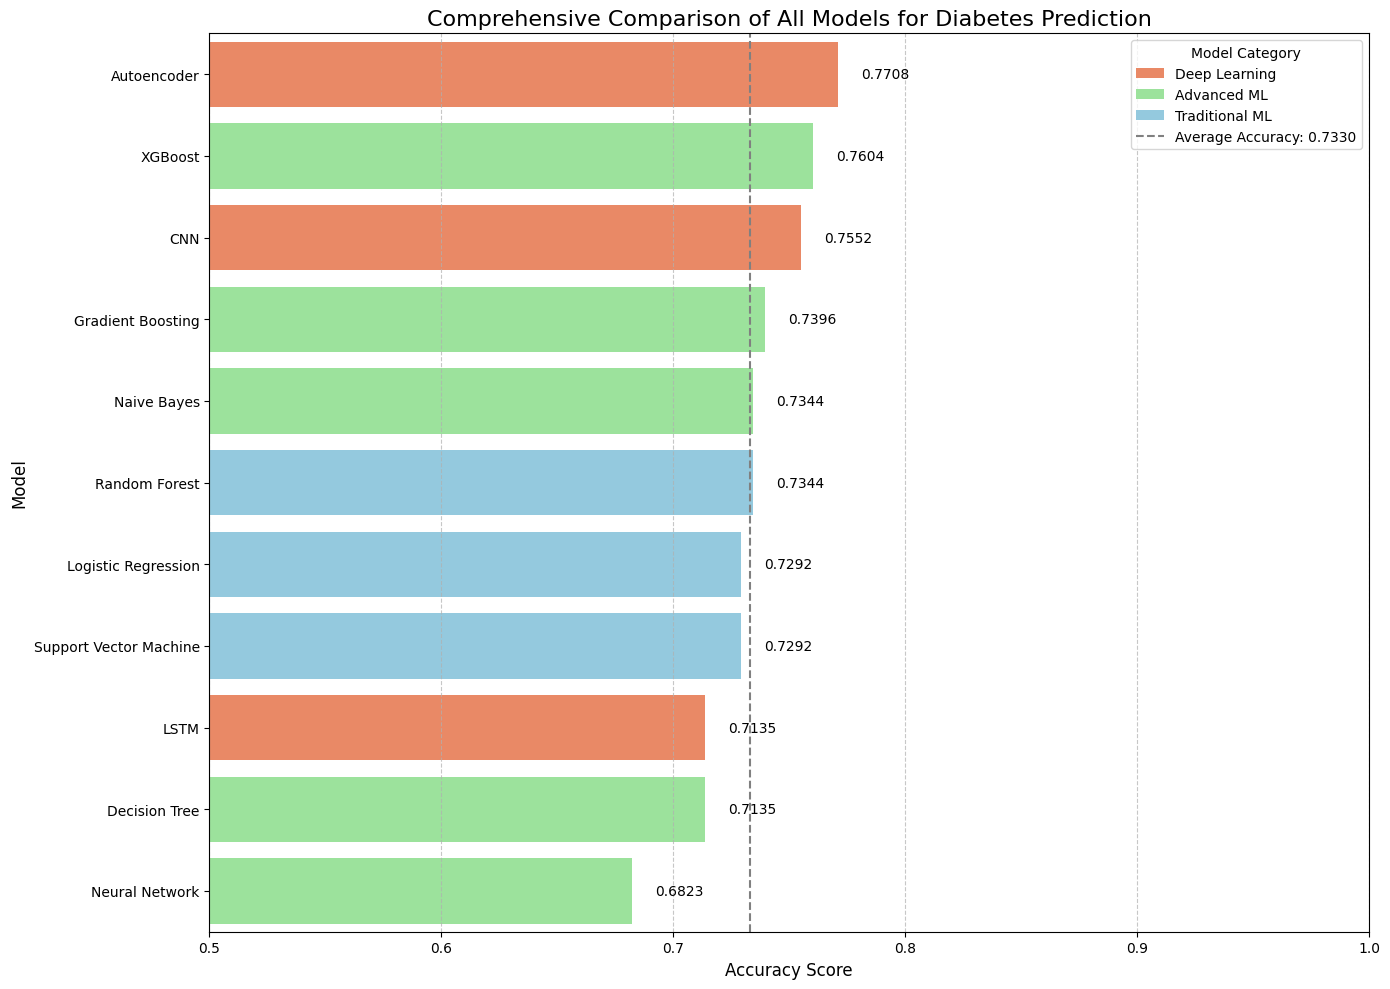


===== COMPREHENSIVE MODEL COMPARISON =====

                 Model  Accuracy     Model Type
           Autoencoder  0.770833  Deep Learning
               XGBoost  0.760417    Advanced ML
                   CNN  0.755208  Deep Learning
     Gradient Boosting  0.739583    Advanced ML
           Naive Bayes  0.734375    Advanced ML
         Random Forest  0.734375 Traditional ML
   Logistic Regression  0.729167 Traditional ML
Support Vector Machine  0.729167 Traditional ML
                  LSTM  0.713542  Deep Learning
         Decision Tree  0.713542    Advanced ML
        Neural Network  0.682292    Advanced ML

Average Accuracy: 0.7330

Best Model: Autoencoder (Accuracy: 0.7708)


In [18]:
# Sort by accuracy
all_models_df = all_models_df.sort_values('Accuracy', ascending=False)

# Create comprehensive comparison plot
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Accuracy', y='Model', hue='Model Type', data=all_models_df,
                palette={'Traditional ML': 'skyblue', 'Deep Learning': 'coral', 'Advanced ML': 'lightgreen'})

# Add value labels
for i, v in enumerate(all_models_df['Accuracy']):
    ax.text(v + 0.01, i, f"{v:.4f}", va='center')

# Add average line
all_avg_acc = np.mean(list(all_combined_results.values()))
plt.axvline(x=all_avg_acc, color='gray', linestyle='--',
            label=f'Average Accuracy: {all_avg_acc:.4f}')

plt.title('Comprehensive Comparison of All Models for Diabetes Prediction', fontsize=16)
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0.5, 1.0)
plt.legend(title='Model Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create metrics table with multiple performance indicators
print("\n===== COMPREHENSIVE MODEL COMPARISON =====\n")
print(all_models_df.to_string(index=False))
print("\nAverage Accuracy:", f"{all_avg_acc:.4f}")
print("\nBest Model:", all_models_df.iloc[0]['Model'], f"(Accuracy: {all_models_df.iloc[0]['Accuracy']:.4f})")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
    Outcome  CNN_Prediction
0         1               1
1         0               0
2         1               1
3         0               0
4         1               1
5         0               0
6         1               0
7         0               0
8         1               1
9         1               0
10        0               0
11        1               1
12        0               1
13        1               1
14        1               1
15        1               0
16        1               0
17        1               0
18        0               0
19        1               0
20        0               1
21        0               0
22        1               1
23        1               0
24        1               1
25        1               0
26        1               1
27        0               0
28        0               1
29        0               0
30        0               0
31        1               1
32        0               0
33      

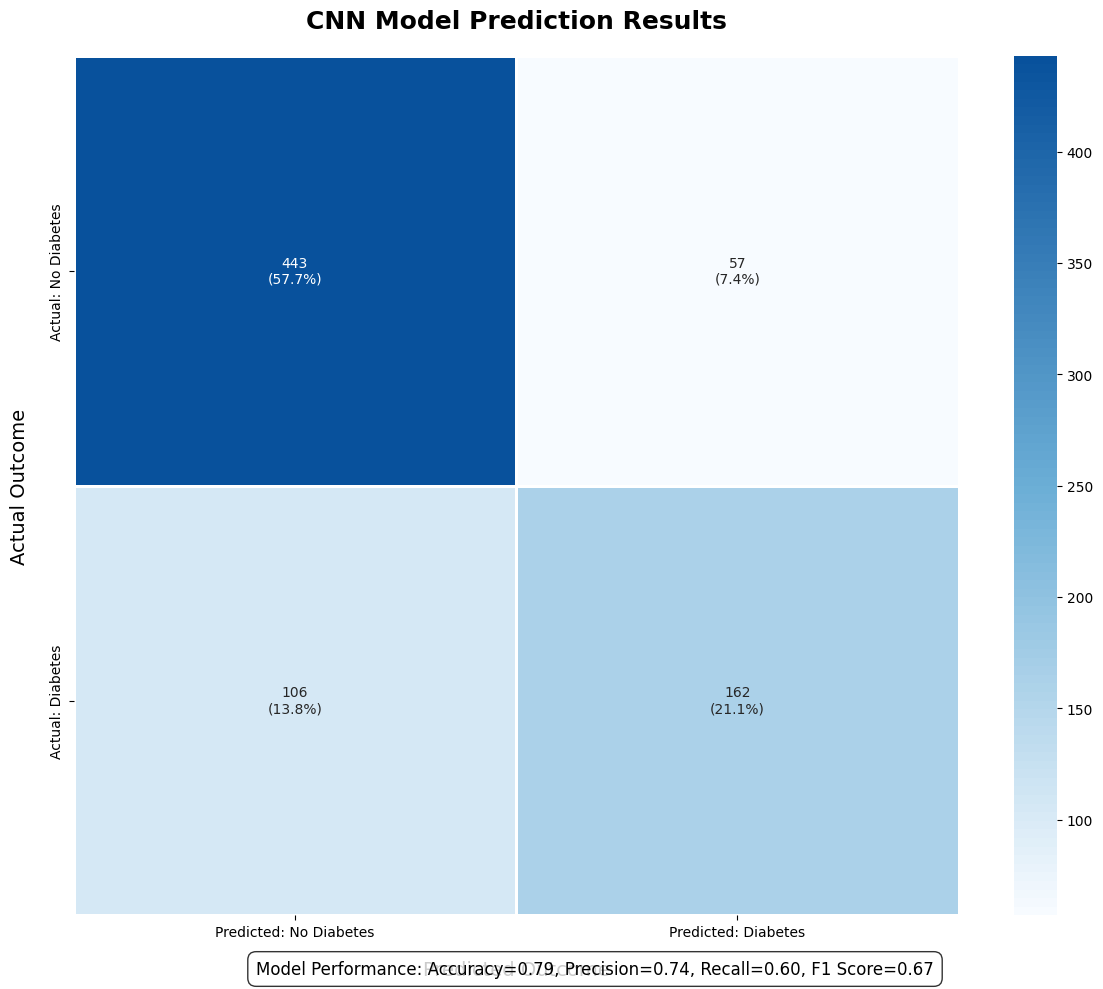

In [14]:
# Create a more aesthetically pleasing pivot table visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Get original data and CNN predictions (reusing the existing code)
original_df = df.copy()
X_all = df.drop('Outcome', axis=1).values
X_all_scaled = scaler.transform(X_all)
X_all_reshaped = X_all_scaled.reshape((X_all.shape[0], X_all.shape[1], 1))
cnn_predictions = (cnn_model.predict(X_all_reshaped) > 0.5).astype(int).flatten()
original_df['CNN_Prediction'] = cnn_predictions
print(original_df [['Outcome', 'CNN_Prediction']].head(50))

# Calculate confusion matrix values
true_pos = ((original_df['Outcome'] == 1) & (original_df['CNN_Prediction'] == 1)).sum()
true_neg = ((original_df['Outcome'] == 0) & (original_df['CNN_Prediction'] == 0)).sum()
false_pos = ((original_df['Outcome'] == 0) & (original_df['CNN_Prediction'] == 1)).sum()
false_neg = ((original_df['Outcome'] == 1) & (original_df['CNN_Prediction'] == 0)).sum()

# Create a manually formatted confusion matrix for more control
conf_matrix = np.array([[true_neg, false_pos], [false_neg, true_pos]])

# Calculate percentages for annotations
total = len(original_df)
percentages = conf_matrix / total * 100

# Calculate metrics
accuracy = (true_pos + true_neg) / total
precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# Create a custom colormap for the heatmap
colors = ["#f7fbff", "#6baed6", "#08519c"]  # Light blue to dark blue
custom_cmap = LinearSegmentedColormap.from_list("custom_blues", colors, N=100)

# Create a beautiful heatmap
plt.figure(figsize=(12, 10))

# Main heatmap
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap,
                xticklabels=['Predicted: No Diabetes', 'Predicted: Diabetes'],
                yticklabels=['Actual: No Diabetes', 'Actual: Diabetes'],
                linewidths=1, linecolor='white')

# Add percentage annotations
for i in range(2):
    for j in range(2):
        text = ax.texts[i * 2 + j]
        text.set_text(f"{conf_matrix[i, j]}\n({percentages[i, j]:.1f}%)")

# Title and styling
plt.title('CNN Model Prediction Results', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Predicted Outcome', fontsize=14, labelpad=15)
plt.ylabel('Actual Outcome', fontsize=14, labelpad=15)

# Add a subtitle with model metrics
plt.figtext(0.5, 0.02,
           f"Model Performance: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1 Score={f1:.2f}",
           ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

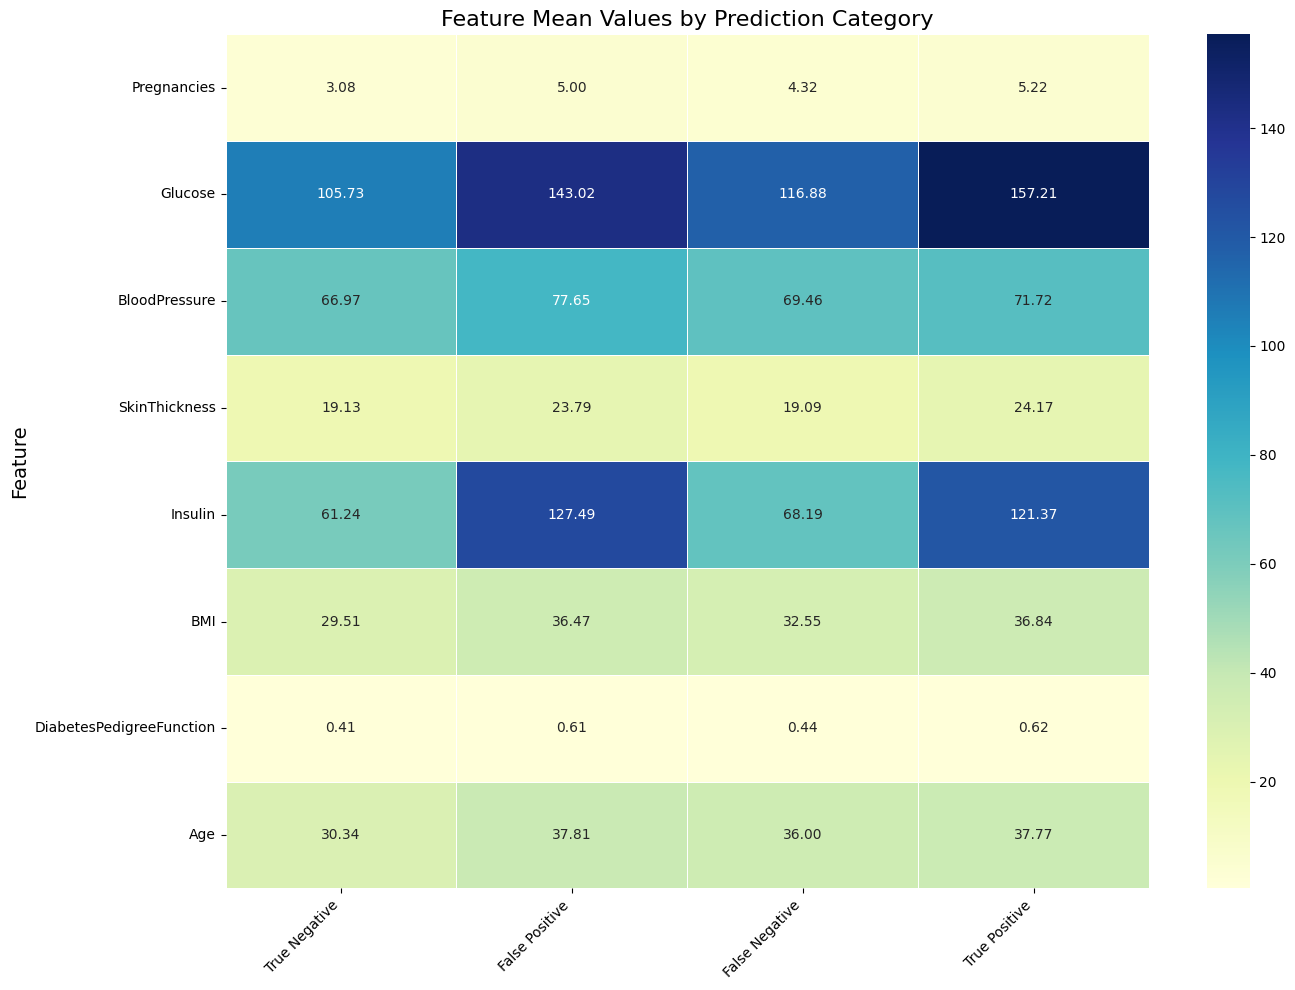

In [13]:
# Create a more detailed feature analysis by prediction category
feature_cols = df.columns.drop('Outcome')

# Define the categories
categories = [
    ('True Negative', (original_df['Outcome'] == 0) & (original_df['CNN_Prediction'] == 0)),
    ('False Positive', (original_df['Outcome'] == 0) & (original_df['CNN_Prediction'] == 1)),
    ('False Negative', (original_df['Outcome'] == 1) & (original_df['CNN_Prediction'] == 0)),
    ('True Positive', (original_df['Outcome'] == 1) & (original_df['CNN_Prediction'] == 1))
]

# Calculate mean features for each category
feature_means = {}
for name, mask in categories:
    feature_means[name] = original_df.loc[mask, feature_cols].mean()

# Convert to DataFrame
feature_means_df = pd.DataFrame(feature_means)

# Create a heatmap of feature means by prediction category
plt.figure(figsize=(14, 10))
sns.heatmap(feature_means_df, annot=True, fmt='.2f', cmap='YlGnBu',
           linewidths=0.5, linecolor='white')
plt.title('Feature Mean Values by Prediction Category', fontsize=16)
plt.ylabel('Feature', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Create a radar chart for comparing feature patterns across prediction categories
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_chart(df, categories):
    # Number of variables
    N = len(df)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

    # Draw the chart for each category with different colors
    colors = ['#2166ac', '#d73027', '#fdae61', '#66bd63']

    for i, (category, color) in enumerate(zip(categories, colors)):
        values = df[category].values.tolist()
        values += values[:1]  # Close the loop

        # Plot the category
        ax.plot(angles, values, color=color, linewidth=2, label=category)
        ax.fill(angles, values, color=color, alpha=0.2)

    # Add feature labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(df.index)

    # Styling
    ax.set_title('Feature Patterns Across Prediction Categories', fontsize=18, pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.tight_layout()
    plt.show()

In [11]:
# Normalize features for radar chart (to get them on the same scale)
from sklearn.preprocessing import MinMaxScaler
scaler_radar = MinMaxScaler()
radar_df = pd.DataFrame(scaler_radar.fit_transform(feature_means_df),
                      index=feature_means_df.index,
                      columns=feature_means_df.columns)

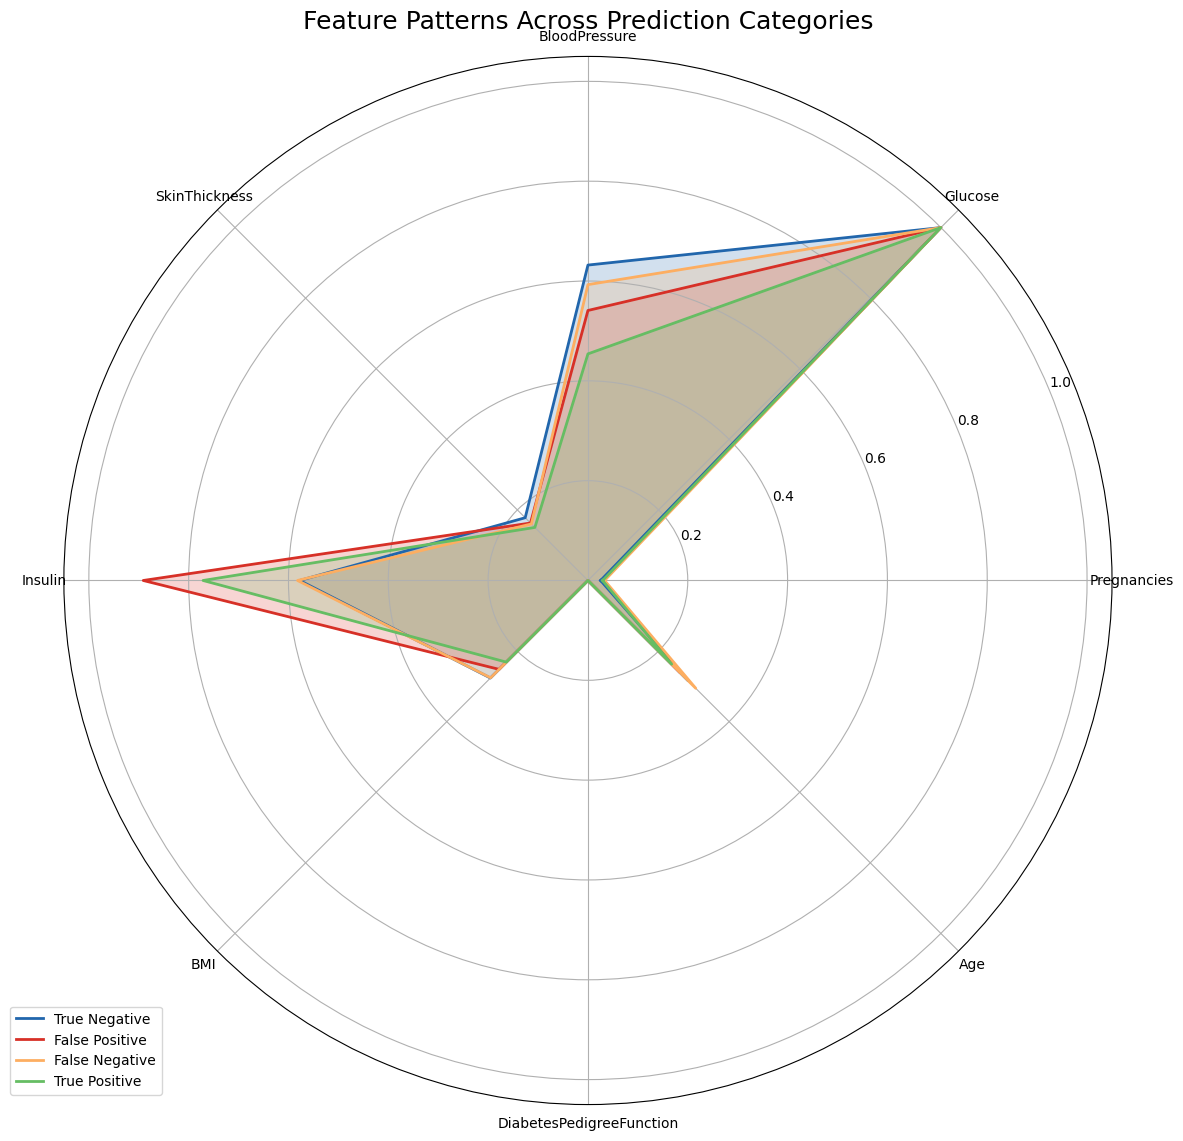

In [9]:
# Plot radar chart
radar_chart(radar_df, ['True Negative', 'False Positive', 'False Negative', 'True Positive'])

<Figure size 1600x1000 with 0 Axes>

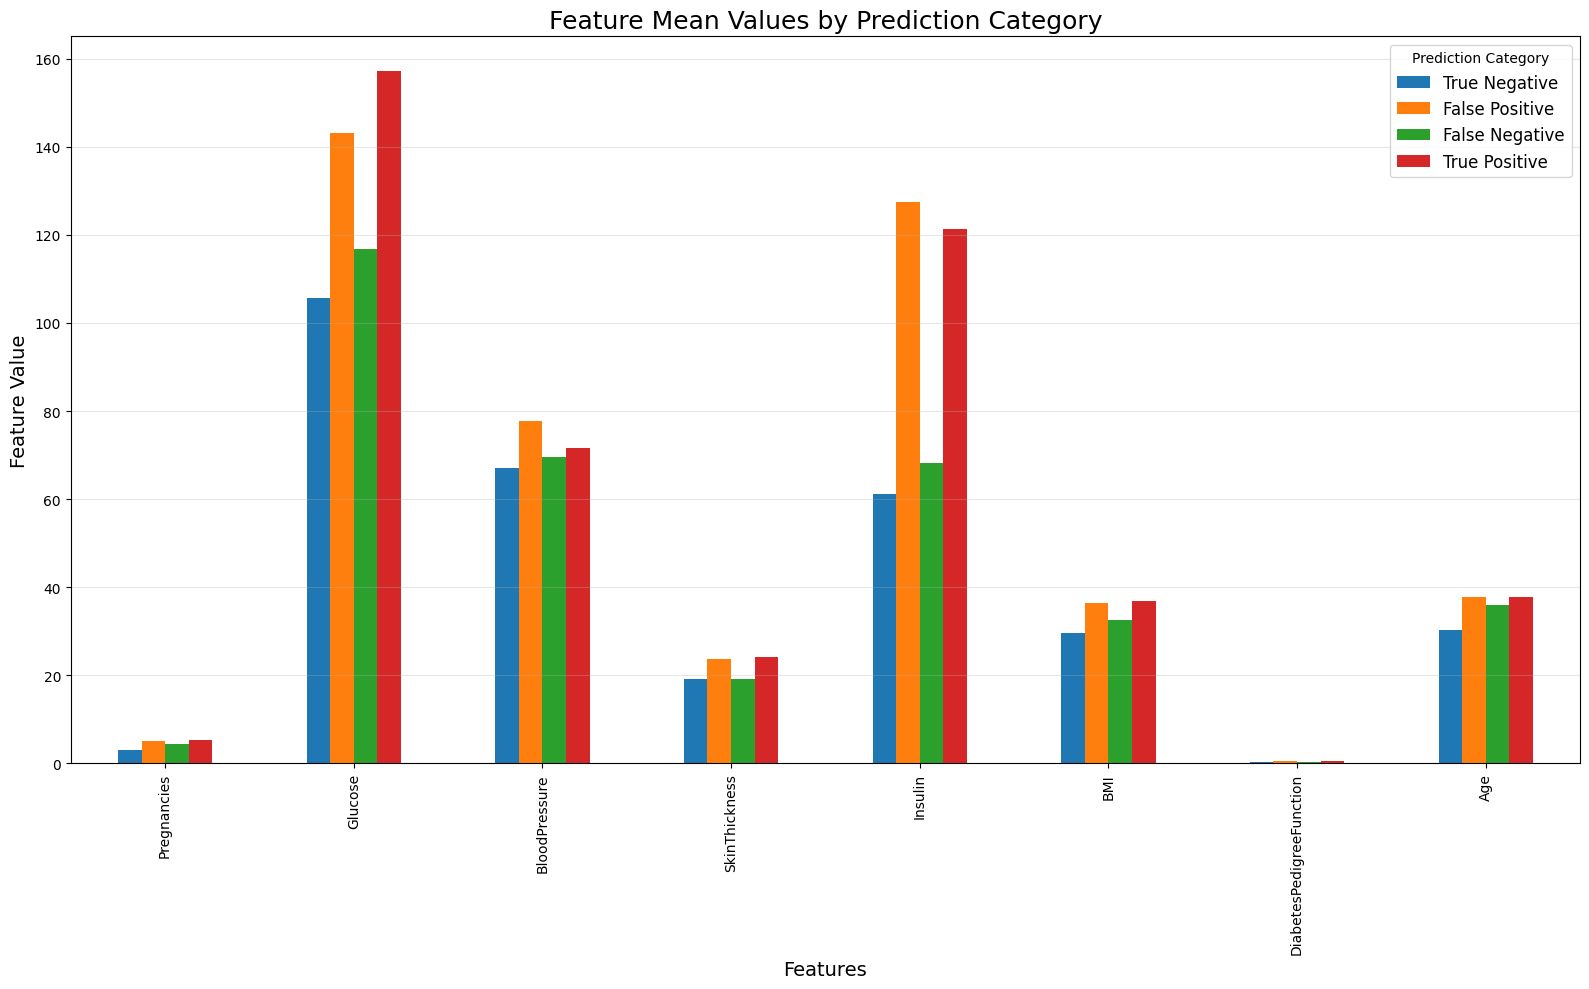

In [10]:
# Create a grouped bar chart showing feature differences
plt.figure(figsize=(16, 10))
feature_means_df.plot(kind='bar', figsize=(16, 10))
plt.title('Feature Mean Values by Prediction Category', fontsize=18)
plt.ylabel('Feature Value', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.legend(title='Prediction Category', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()